In [31]:
import pandas as pd 
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [32]:
a_renomear = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [33]:
a_trocar = {
    'no':0,
    'yes':1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [34]:
from datetime import datetime


ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [35]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [36]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)

In [37]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [38]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 57.00%


/home/laryssastephanie/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acuracia do dummy stratified foi %.2f%%" % acuracia)

A acuracia do dummy stratified foi 52.20%


In [41]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acuracia do dummy mostfrequent foi %.2f%%" % acuracia)

A acuracia do dummy mostfrequent foi 58.00%


In [42]:
# Padronizar os dados num intervalo de valores específico (Scaler)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler() # tirar a média e dividir pelo desvio padrão - cria um intervalo de onde os dados vão estar
scaler.fit(raw_treino_x) # usa os dados crus para treinar
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

# A acurácia ficou bem melhor neste modelo

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 76.04%


## Introduzindo Árvores de Decisão
---

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 78.04%


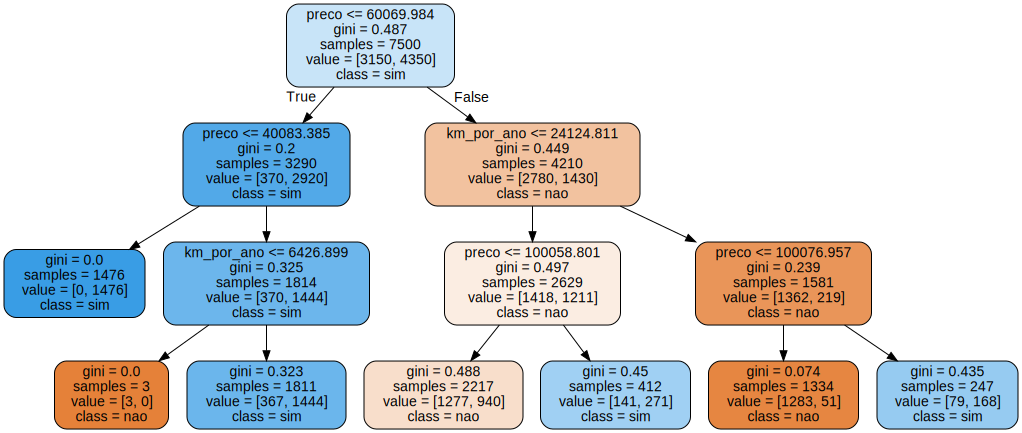

In [44]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, 
                            filled=True, rounded=True,
                            feature_names=features,
                            class_names=['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

## Cross Validation
---

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
SEED = 10
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = 5, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cv, 5 [%.2f %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cv, 5 [75.21 76.35]


### Aleatoriedade no cross validate
---

Notem que o cross_validate() não recebe o parâmetro de aleatoriedade, e esse é o padrão. Da maneira utilizada por nós, ele é determinístico, e nós sabemos em quantos pedaços ele quebrará os dados, porque somos nós quem decidimos essa quantidade. Portanto, a realidade é que a aleatoriedade (random) só é aplicada em DecisionTreeClassifier(). E, por padrão, ele só a usará em um caso específico e raro. Por estas razões, mesmo que mudemos constantemente o valor de SEED, obteremos basicamente sempre os mesmos números.

A ideia era rodar aleatoriamente, de fato. Por mais que recebamos todos os dados em uma sequência, não queremos quebrar eles em 5 pedaços e, a partir disso, fazer o cross_validate. O ideal seria embaralhar estes dados e, então executar a validação cruzada. O algorítimo pode fazer isso de maneira mais inteligente, sem embaralhar e copiar todo o espaço de memória e todos os objetos que estiverem dentro, e assim por diante. Mas o importante é a ideia de embaralhar esses dados de alguma maneira, e o cross_validate não faz isso de verdade.

In [47]:
from sklearn.model_selection import KFold # KFold é um splitter

In [48]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy médio: %.2f" % (media * 100))
    print("Accuracy intervalo: = [%.2f %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [49]:
SEED = 300
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: = [74.37 77.19]


In [50]:
SEED = 300
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: = [71.87 79.69]


### Simular uma situação de azar
---
Pode ser 'azar' ou uma proporção de exemplos desbalanceados entre as classes

In [51]:
dados_azar = dados.sort_values("vendido", ascending=True)

In [52]:
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']

In [53]:
# Sem Shuffle
SEED = 300
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
imprime_resultados(results)

Accuracy médio: 57.84
Accuracy intervalo: = [34.29 81.39]


In [54]:
# Com Shuffle
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: = [72.30 79.26]


In [55]:
from sklearn.model_selection import StratifiedKFold

# Interessante usar o stratified quando há desbalanço entre as classes para poder manter a proporção

In [56]:
# Com Shuffle
SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score = False) # cv entre 5 e 10 é considerado o padrão
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: = [73.55 78.01]


## Trabalhando com características de agrupamento
---

Gerando dados aleatórios de modelo de carro para testar agrupamentos

In [57]:
# np.random.seed(SEED)
dados ['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,22,35085.22134,24
1,40557.96,1,24,12622.05362,23
2,89627.50,0,16,11440.79806,15
3,95276.14,0,7,43167.32682,9
4,117384.68,1,8,12770.11290,8
...,...,...,...,...,...
9995,97112.86,0,16,25060.64248,16
9996,107424.63,1,20,21317.31764,19
9997,93856.99,0,8,20950.38812,8
9998,51250.57,1,11,16840.13376,12


In [59]:
dados.modelo.unique()

array([24, 23, 15,  9,  8, 16, 22, 12, 21, 17,  7, 11, 14, 19, 13, 18, 20,
        5, 25, 26,  6, 10,  4,  3])

In [ ]:
# caso tenha -1 gerado
# dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1

### Testando o estimador, agrupando por modelo
---

In [60]:
from sklearn.model_selection import GroupKFold

In [62]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score = False) # groups
imprime_resultados(results)

Accuracy médio: 75.77
Accuracy intervalo: = [73.94 77.60]


## Cross Validation com StandardScaler
---

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [66]:
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

A acuracia foi 76.04%


In [68]:
# esta forma está errada, pois para cada conjunto de treino, tem que ser rodado o processo de scaler, para isso temos que fazer o pipeline

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score = False) # groups
imprime_resultados(results)

Accuracy médio: 77.26
Accuracy intervalo: = [75.56 78.96]


### Criando um processo - Pipeline
---

In [69]:
from sklearn.pipeline import Pipeline

In [71]:
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformação', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score = False) # groups
imprime_resultados(results)

Accuracy médio: 76.70
Accuracy intervalo: = [75.21 78.19]


Reparem que o valor anterior e este não são tão distantes, mas é preciso entender que a forma feita anteriormente estava errada, porque rodávamos o scaler somente uma vez, para depois rodar os KFolds. Não é questão de estar melhor ou pior, pois estamos falando de um processo, que deve ser rodado para cada uma das fases de treino. Portanto, se tivermos 10 fases de treino, teremos que rodar o scaler para cada uma do conjunto de treino. E é isso que o Pipeline faz para nós, de forma muito mais prática. Basta inserir todas as fases nele e rodar. Claro, pode demorar um pouco mais, mas é a opção que faz mais sentido.

Para rodar algorítimos com cross_validate, que exigem pré processamento, vocês talvez queiram fazer o treino desse pré processamento somente na parte de treino. Para isso será necessário incluí-lo em um Pipeline.